# importing training dataset

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading dataset

In [134]:
df=pd.read_csv("C:/Users/Lenovo/Desktop/dataset/project datatrained/trainbigmart1.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


checking dimension

In [135]:
df.shape

(8523, 12)

checking null values

In [136]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [138]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [139]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [140]:
df_nominal=df[['Item_Fat_Content','Item_Type','Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']].copy()

In [141]:
df_nominal

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,1998,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,1987,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,2009,Medium,Tier 3,Supermarket Type2


looking for unique values in df_nominal columns

In [142]:
for i in df_nominal.columns:
    print(i)
    print(df_nominal[i].unique())

Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size
['Medium' nan 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


though LowFat,lowfat and LF are same convert into single catagory.
regular and reg are same so convert into single one

In [143]:
df_nominal['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [144]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['Low Fat', 'low fat'], 'LF')

In [145]:
df['Item_Fat_Content'].unique()

array(['LF', 'Regular', 'reg'], dtype=object)

In [146]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace( 'Regular', 'reg')

In [147]:
df['Item_Fat_Content'].unique()

array(['LF', 'reg'], dtype=object)

In [148]:
df_nominal=df[['Item_Fat_Content','Item_Type','Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']].copy()

checking freequency and counts of catagorical columns

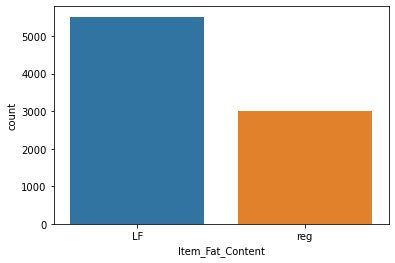

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64


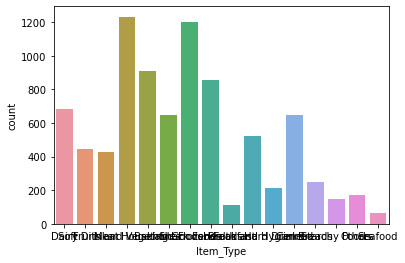

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


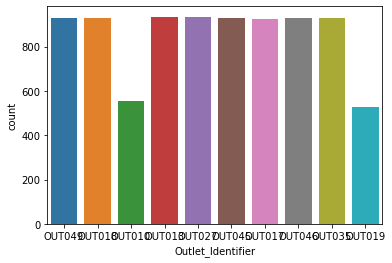

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


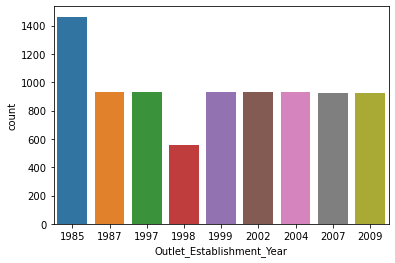

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


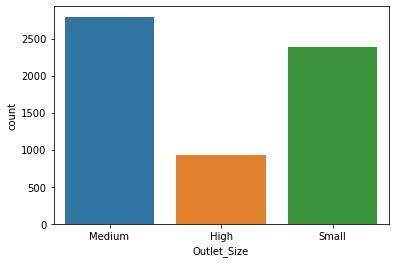

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


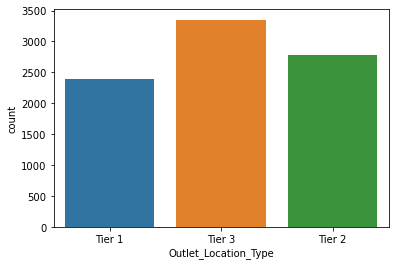

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


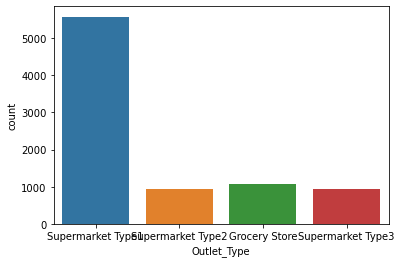

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [149]:
for i in df_nominal.columns:
    sns.countplot(x=df_nominal[i],data=df_nominal)
    plt.show()
    print(df_nominal[i].value_counts())

In [150]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


checking null values and replace it

In [151]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

removing null values

In [152]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [153]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [154]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [155]:
df['Outlet_Size']=df['Outlet_Size'].replace(np.nan,'Medium')

In [156]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [157]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

null values are removed .Now we have to encode catagorical features

In [158]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [159]:
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [160]:
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])

In [161]:
df['Outlet_Establishment_Year']=le.fit_transform(df['Outlet_Establishment_Year'])

In [162]:
df[ 'Outlet_Size']=le.fit_transform(df[ 'Outlet_Size'])

In [163]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

In [164]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [165]:
from sklearn.preprocessing import OrdinalEncoder
od=OrdinalEncoder()

In [166]:
df['Item_Identifier']=od.fit_transform(df['Item_Identifier'].values.reshape(-1,1))

In [167]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8.0,5.920,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662.0,17.500,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121.0,19.200,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297.0,8.930,0,0.000000,9,53.8614,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0,0.056783,13,214.5218,1,1,0,2,1,2778.3834
8519,897.0,8.380,1,0.046982,0,108.1570,7,5,1,1,1,549.2850
8520,1357.0,10.600,0,0.035186,8,85.1224,6,6,2,1,1,1193.1136
8521,681.0,7.210,1,0.145221,13,103.1332,3,8,1,2,2,1845.5976


In [168]:
df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

checking outliers in the dataset

In [169]:
#statistical analysis
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,3.790684,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,2.730322,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,4.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,6.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,8.000000,2.000000,2.000000,3.000000,13086.964800


checking outlier in continious features

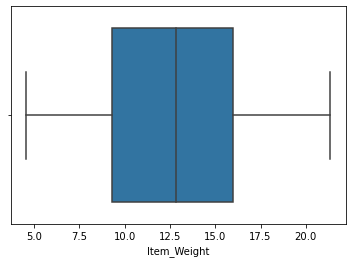

In [170]:
sns.boxplot(df['Item_Weight'])

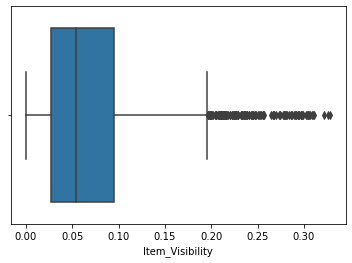

In [171]:
sns.boxplot(df['Item_Visibility'])

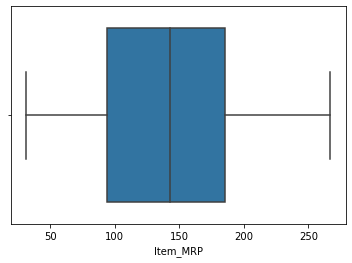

In [172]:
sns.boxplot(df['Item_MRP'])

checking outliers

In [173]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [174]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(8338, 12)

In [175]:
dataloss=(8523-8338)/8523
dataloss

0.02170597207556025

In [176]:
df=df_new

In [177]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8.0,5.920,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662.0,17.500,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121.0,19.200,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297.0,8.930,0,0.000000,9,53.8614,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0,0.056783,13,214.5218,1,1,0,2,1,2778.3834
8519,897.0,8.380,1,0.046982,0,108.1570,7,5,1,1,1,549.2850
8520,1357.0,10.600,0,0.035186,8,85.1224,6,6,2,1,1,1193.1136
8521,681.0,7.210,1,0.145221,13,103.1332,3,8,1,2,2,1845.5976


checking skewness of these three columns.because all are catagorical features

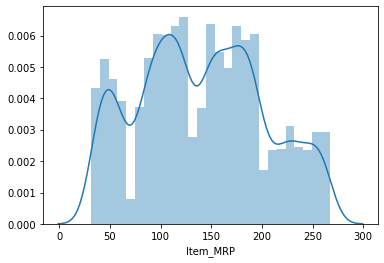

In [178]:
sns.distplot(df['Item_MRP'])

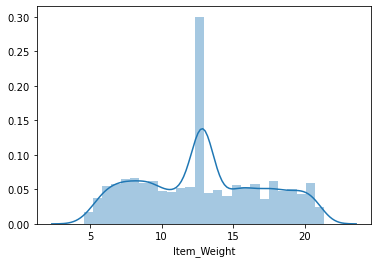

In [179]:
sns.distplot(df['Item_Weight'])

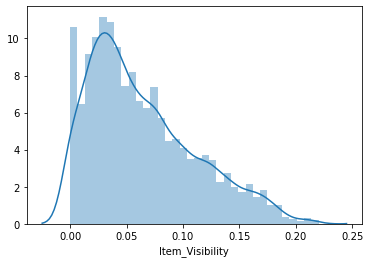

In [180]:
sns.distplot(df['Item_Visibility'])

In [181]:
df.skew()

Item_Identifier             -0.007837
Item_Weight                  0.089291
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year    0.012512
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

skewness present in item visibility column.we remove it by using power_transform

In [182]:
from sklearn.preprocessing import power_transform

In [183]:
df['Item_Visibility']=power_transform(df['Item_Visibility'].values.reshape(-1,1))

<ipython-input-183-197b7b17da32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Visibility']=power_transform(df['Item_Visibility'].values.reshape(-1,1))


In [184]:
df.skew()

Item_Identifier             -0.007837
Item_Weight                  0.089291
Item_Fat_Content             0.620973
Item_Visibility              0.115911
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year    0.012512
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

outlier have been removed from item_visibility and checking corelation

In [185]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.045038,-0.116444,-0.026196,-0.015179,0.014696,-0.009507,-0.014684,0.001746,0.002106,-0.003624,0.004547
Item_Weight,0.045038,1.000000,-0.020514,-0.009034,0.028886,0.024233,-0.010107,-0.007950,-0.007802,0.005530,-0.001817,0.010671
Item_Fat_Content,-0.116444,-0.020514,1.000000,0.048907,-0.138727,0.006773,0.003628,0.004062,-0.001301,-0.002858,0.004675,0.022835
Item_Visibility,-0.026196,-0.009034,0.048907,1.000000,-0.041308,0.004710,-0.060278,-0.042231,0.039257,-0.013197,-0.104057,-0.078443
Item_Type,-0.015179,0.028886,-0.138727,-0.041308,1.000000,0.031415,0.001268,0.007717,-0.002050,0.003364,0.001723,0.016930
Item_MRP,0.014696,0.024233,0.006773,0.004710,0.031415,1.000000,0.000377,0.017170,0.007177,-0.004949,-0.021542,0.569544
Outlet_Identifier,-0.009507,-0.010107,0.003628,-0.060278,0.001268,0.000377,1.000000,-0.035294,0.511039,-0.724524,0.087085,0.163970
Outlet_Establishment_Year,-0.014684,-0.007950,0.004062,-0.042231,0.007717,0.017170,-0.035294,1.000000,0.080720,0.044153,-0.034542,-0.002096
Outlet_Size,0.001746,-0.007802,-0.001301,0.039257,-0.002050,0.007177,0.511039,0.080720,1.000000,-0.610556,-0.193847,-0.077383
Outlet_Location_Type,0.002106,0.005530,-0.002858,-0.013197,0.003364,-0.004949,-0.724524,0.044153,-0.610556,1.000000,0.465923,0.066880


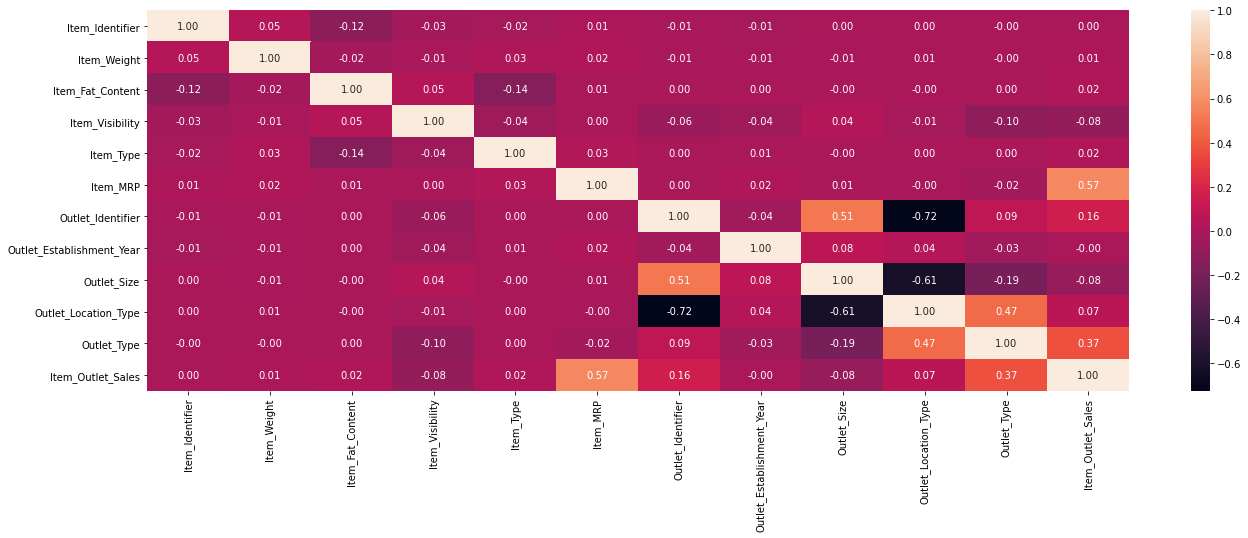

In [186]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')
plt.show()

In [187]:
x=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']


now we have to divide dataset in train and test and finding best random state

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [189]:
maxacc=0
maxrs=0
for i in range(2,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x,y)
    y_pred=lr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy score of',maxacc,'on random state',maxrs)
        

best accuracy score of 0.5307680277509903 on random state 50


In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [191]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.5279437681058088

finding cv 

In [192]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvscore=cross_val_score(lr,x_train,y_train,cv=j)
    print(cvscore.mean(),'for',j)

0.48050991735266335 for 2
0.4829125056993157 for 3
0.4820963534025028 for 4
0.4819664324122145 for 5
0.4821172982887398 for 6
0.482458879691566 for 7
0.48121003120643213 for 8
0.4811940707376087 for 9


best cv=3

Text(0.5, 1.0, 'linear regression')

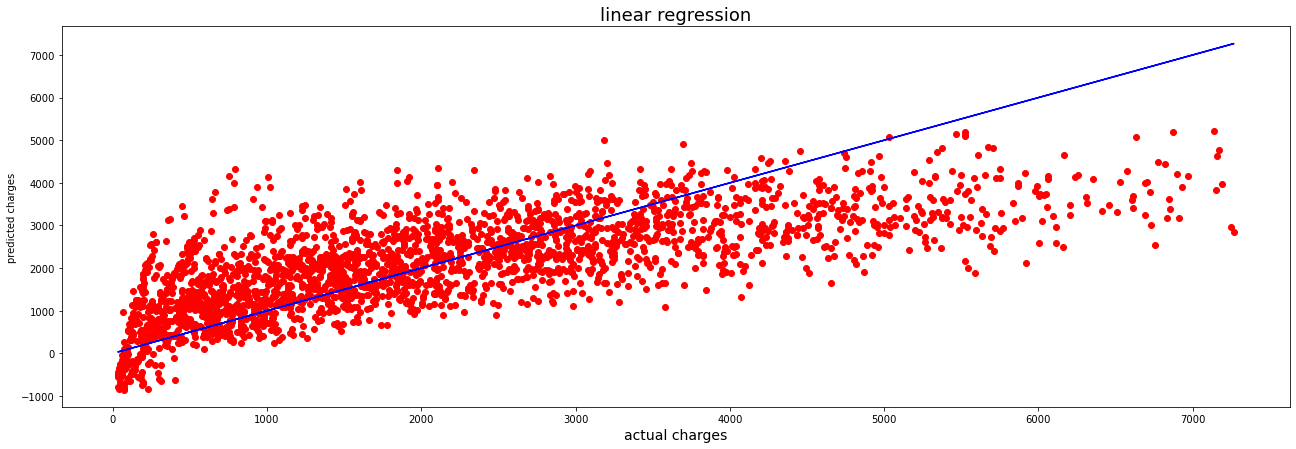

In [193]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual charges',fontsize=14)
plt.ylabel('predicted charges')
plt.title('linear regression',fontsize=18)

choosing best algorithm

In [194]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [195]:
ls=Lasso()
rf=RandomForestRegressor()
svr=SVR()
rd=Ridge()
els=ElasticNet()

In [196]:
model=[lr,ls,rf,svr,rd,els]

In [197]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(r2_score(y_test,y_pred))
    print(mean_squared_error(y_test,y_pred))

LinearRegression()
0.5279437681058088
1172779.713041156
Lasso()
0.527773519391415
1173202.6801050825
RandomForestRegressor()
0.5740527586432576
1058226.2233559543
SVR()
-0.027932523433116696
2553802.552336131
Ridge()
0.5279428398777013
1172782.0191373792
ElasticNet()
0.499194394195562
1244204.853112455


for overfitting of the model we use cross_val_score and cv 

In [198]:
model=[lr,ls,rf,svr,rd,els]

cv=3 for best accuracy

In [199]:
for i in model:
    cvscore=cross_val_score(i,x_train,y_train,cv=3)
    print('for',i,'accuracy_score is',cvscore.mean())

for LinearRegression() accuracy_score is 0.4829125056993157
for Lasso() accuracy_score is 0.48290933631167415
for RandomForestRegressor() accuracy_score is 0.529160318825168
for SVR() accuracy_score is -0.0412804176526446
for Ridge() accuracy_score is 0.48291704685355824
for ElasticNet() accuracy_score is 0.4552502119022345


randomforest is best algorithm for the dataset and we hypertune it by using gridsearchcv

In [200]:
from sklearn.model_selection import GridSearchCV

In [131]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc=r2_score(y_test,y_pred)
acc

0.5716079527827852

saving the model

In [132]:
import joblib
joblib.dump(rf,'bigmart.obj')

['bigmart.obj']

# importing test dataset

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df1=pd.read_csv("C:/Users/Lenovo/Desktop/dataset/project datatrained/testbigmart.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


checking dimension

In [205]:
df1.shape

(5681, 11)

In [206]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [207]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

checking unique values

In [209]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
df1.head()

In [211]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [212]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace(['Low Fat', 'low fat'], 'LF')

In [213]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace( 'Regular', 'reg')

In [215]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,LF,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,LF,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,LF,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,reg,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,reg,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,reg,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,LF,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,reg,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


removing null values

In [216]:
df1['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [217]:
df1['Outlet_Size']=df1['Outlet_Size'].replace(np.nan,'Medium')

In [218]:
df1['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [219]:
df1['Item_Weight']=df1['Item_Weight'].replace(np.nan,df1['Item_Weight'].mean())

In [220]:
df1_nominal=df1[['Item_Fat_Content','Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']].copy()

In [221]:
df1_nominal

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,LF,Snack Foods,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,reg,Dairy,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,LF,Others,OUT010,1998,Medium,Tier 3,Grocery Store
3,LF,Snack Foods,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,reg,Dairy,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...
5676,reg,Snack Foods,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,reg,Starchy Foods,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,LF,Health and Hygiene,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,reg,Canned,OUT017,2007,Medium,Tier 2,Supermarket Type1


null values are removed.we have to see catagorical value and convert it

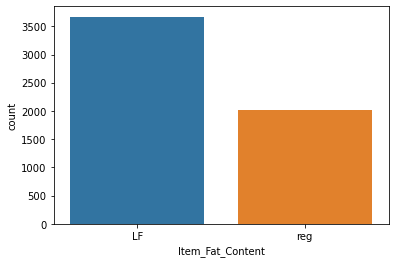

LF     3668
reg    2013
Name: Item_Fat_Content, dtype: int64


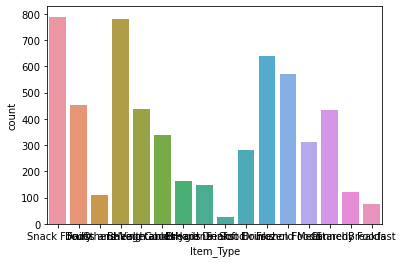

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


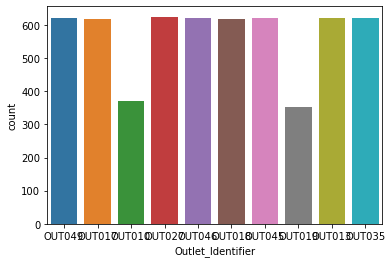

OUT027    624
OUT013    621
OUT046    620
OUT049    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64


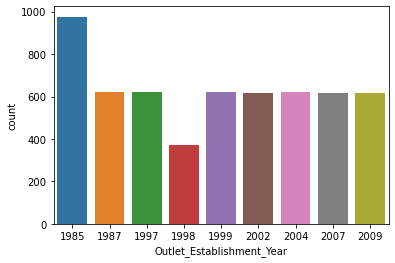

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64


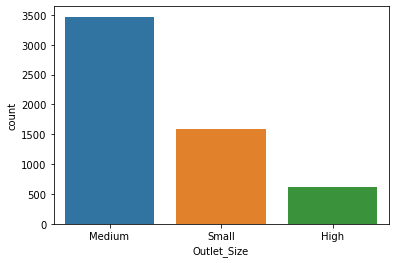

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64


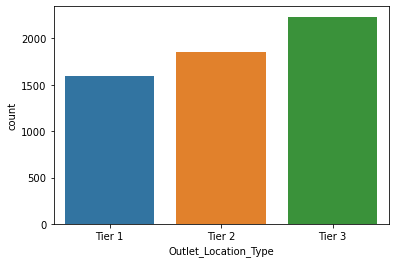

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64


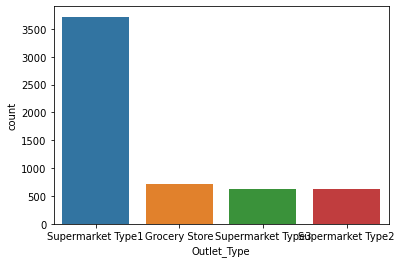

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64


In [222]:
for i in df1_nominal.columns:
    sns.countplot(x=df1_nominal[i],data=df1_nominal)
    plt.show()
    print(df1_nominal[i].value_counts())

In [223]:
df1_nominal.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [224]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Item_Fat_Content']=le.fit_transform(df1['Item_Fat_Content'])

In [225]:
df1['Item_Type']=le.fit_transform(df1['Item_Type'])

In [226]:
df1['Outlet_Identifier']=le.fit_transform(df1['Outlet_Identifier'])

In [227]:
df1['Outlet_Establishment_Year']=le.fit_transform(df1['Outlet_Establishment_Year'])

In [228]:
df1['Outlet_Size']=le.fit_transform(df1['Outlet_Size'])

In [229]:
df1['Outlet_Type']=le.fit_transform(df1['Outlet_Type'])

In [230]:
df1['Outlet_Location_Type']=le.fit_transform(df1['Outlet_Location_Type'])

In [231]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,13,107.8622,9,4,1,0,1
1,FDW14,8.300000,1,0.038428,4,87.3198,2,7,1,1,1
2,NCN55,14.600000,0,0.099575,11,241.7538,0,3,1,2,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,2,7,1,1,1
4,FDY38,12.695633,1,0.118599,4,234.2300,5,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,13,141.3154,8,2,2,0,1
5677,FDD47,7.600000,1,0.142991,15,169.1448,3,8,1,2,2
5678,NCO17,10.000000,0,0.073529,8,118.7440,7,5,1,1,1
5679,FDJ26,15.300000,1,0.000000,3,214.6218,2,7,1,1,1


item_identifier column is object type so we ordinalencode it

In [232]:
from sklearn.preprocessing import OrdinalEncoder
od=OrdinalEncoder()
df1['Item_Identifier']=od.fit_transform(df1['Item_Identifier'].values.reshape(-1,1))

In [233]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,0,0.007565,13,107.8622,9,4,1,0,1
1,1067.0,8.300000,1,0.038428,4,87.3198,2,7,1,1,1
2,1406.0,14.600000,0,0.099575,11,241.7538,0,3,1,2,0
3,809.0,7.315000,0,0.015388,13,155.0340,2,7,1,1,1
4,1184.0,12.695633,1,0.118599,4,234.2300,5,0,1,2,3


checking outlier

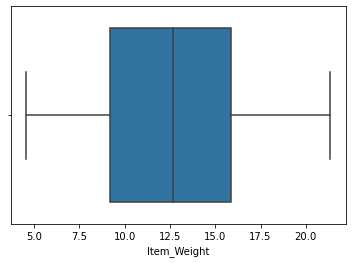

In [234]:
sns.boxplot(df1['Item_Weight'])

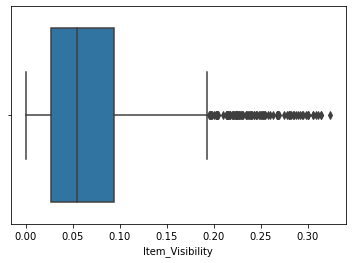

In [235]:
sns.boxplot(df1['Item_Visibility'])

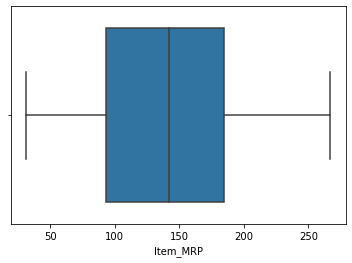

In [236]:
sns.boxplot(df['Item_MRP'])

In [237]:
df1.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.00000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,0.354339,0.065684,7.233410,141.023273,4.722760,3.78965,1.170921,1.112832,1.201373
std,445.525926,4.245189,0.478355,0.051252,4.219057,61.809091,2.837201,2.73036,0.600328,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,382.000000,9.195000,0.000000,0.027047,4.000000,94.412000,2.000000,1.00000,1.000000,0.000000,1.000000
50%,771.000000,12.695633,0.000000,0.054154,6.000000,141.415400,5.000000,4.00000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,1.000000,0.093463,10.000000,186.026600,7.000000,6.00000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,1.000000,0.323637,15.000000,266.588400,9.000000,8.00000,2.000000,2.000000,3.000000


checking skewness

In [238]:
df1.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.609223
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year    0.034635
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [239]:
from scipy.stats import zscore

In [240]:
z=np.abs(zscore(df1))
print(np.where(z>3))

(array([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
        871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
       1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
       2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
       3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
       4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
       4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
       5482, 5514, 5571, 5668], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))


removing outlier

In [241]:
df1=df1[(z<3).all(axis=1)]
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,0,0.007565,13,107.8622,9,4,1,0,1
1,1067.0,8.300000,1,0.038428,4,87.3198,2,7,1,1,1
2,1406.0,14.600000,0,0.099575,11,241.7538,0,3,1,2,0
3,809.0,7.315000,0,0.015388,13,155.0340,2,7,1,1,1
4,1184.0,12.695633,1,0.118599,4,234.2300,5,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,1,0.013496,13,141.3154,8,2,2,0,1
5677,306.0,7.600000,1,0.142991,15,169.1448,3,8,1,2,2
5678,1412.0,10.000000,0,0.073529,8,118.7440,7,5,1,1,1
5679,517.0,15.300000,1,0.000000,3,214.6218,2,7,1,1,1


In [242]:
dataloss=(5681-5600)/5681
dataloss

0.01425805315965499

1.4% dataloss  so we remove it

In [243]:
df1.skew()

Item_Identifier             -0.001969
Item_Weight                  0.140901
Item_Fat_Content             0.616007
Item_Visibility              0.787861
Item_Type                    0.091394
Item_MRP                     0.133061
Outlet_Identifier           -0.069734
Outlet_Establishment_Year    0.018036
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

removing skewness from item_visibility column

In [244]:
from sklearn.preprocessing import power_transform
df1['Item_Visibility']=power_transform(df1['Item_Visibility'].values.reshape(-1,1))

<ipython-input-244-ff02aacc1e5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Item_Visibility']=power_transform(df1['Item_Visibility'].values.reshape(-1,1))


In [257]:
df1.skew()

Item_Identifier             -0.001969
Item_Weight                  0.140901
Item_Fat_Content             0.616007
Item_Visibility              0.105676
Item_Type                    0.091394
Item_MRP                     0.133061
Outlet_Identifier           -0.069734
Outlet_Establishment_Year    0.018036
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

our model is ready to predict

In [246]:
pred=joblib.load('bigmart.obj')

In [247]:
pred

RandomForestRegressor()

In [249]:
data=pred.predict(df1)
data

array([1632.448388, 1323.823456,  764.245188, ..., 1807.500524,
       3686.907448, 1463.774616])

In [256]:
data=pd.DataFrame(data)
data

,0
0,1632.448388
1,1323.823456
2,764.245188
3,2055.817292
4,4545.256808
...,...
5595,2274.559224
5596,2992.944108
5597,1807.500524
5598,3686.907448
